# Spam dataset analysis: train and test a logistic regressor

In this tutorial, the train and test of a logistic regressor will be demonstrated for the spam dataset.

## PRE-ANALYSIS 
Let's start with importing the necessary libraries for an initial pre-analysis:

In [2]:
from pathlib import Path
import pandas as pd
from text_analysis.read_write_data import read_data
from text_analysis.split_dataframe import split_dataframe
from text_analysis.cleantext import rename_columns, drop_empty_rows
from text_analysis.cleantext import find_initial_columns
from text_analysis.preanalysis import info_data, plot_label_distribution
from text_analysis.preanalysis import word_count_text, char_count_text
from text_analysis.preanalysis import average_word_or_chars
from text_analysis.preanalysis import plotting_word_char_count, printer_word_chars

[nltk_data] Downloading package omw-1.4 to /home/flavio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/flavio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/flavio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In the next step we will set the analysis name, which is the folder name that contains the data.
Then we set thee seed in order to have a deterministic behaviour and then we set the dataset folder path.

In [6]:
analysis_name = 'spam'
seed = 42
dataset_folder = Path('../datasets') / analysis_name
if not dataset_folder.is_dir():
    print('The dataset folder path links to a path which is not a folder!')

Let's see how many files there are inside the folder:

In [9]:
print(list(dataset_folder.glob('**/*.csv')))

[PosixPath('../datasets/spam/spam_encoded.csv')]


All the data are stored in one single dataset.
Now we can read the data inside the folder and then split the dataset.
We will obtain three different pandas dataframes: train, validation, test dataframe.

In [11]:
dfs_raw = read_data(dataset_folder)
train_fraction = 0.70
test_fraction = 0.15
# the first one has to be the train frac and the second one the test frac:
fractions = (train_fraction, test_fraction) 
df_train, df_val, df_test = split_dataframe(dfs_raw, fractions, seed)

Now let's find the inital column names for the text and labels.
Then we clean a little bit the dataframes: we remove rows with empty cells from the dataframes.

In [13]:
text_col_name, label_col_name  = find_initial_columns(analysis_name)

df_new = []
for df in (df_train, df_val, df_test):
    df_new.append(drop_empty_rows(rename_columns(df, text_col_name, label_col_name)))
    
df_train, df_val, df_test = df_new


Now we can ask some informations about the dataframes.
Then we plot label distribution.

In [16]:
info_data(df_train, df_val, df_test)


First five rows of train dataset
                                                text  label
0  House-Maid is the murderer, coz the man was mu...      0
1              Any pain on urination any thing else?      0
2                                        Lmao!nice 1      0
3                     What time you thinkin of goin?      0
4             Full heat pa:-) i have applyed oil pa.      0

Description of train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3900 non-null   object
 1   label   3900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.1+ KB

Description of validation dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    836 non-null    object
 1   label   836 non-null    


Train dataset label distribution:
0    3377
1     523
Name: label, dtype: int64

Valid dataset label distribution:
0    720
1    116
Name: label, dtype: int64

Test dataset label distribution:
0    728
1    108
Name: label, dtype: int64


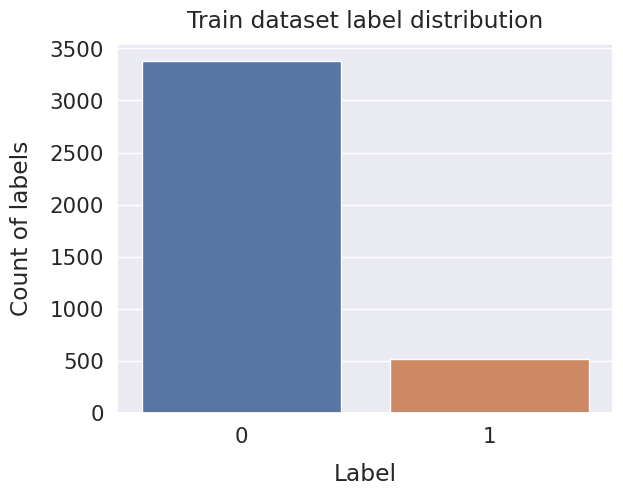

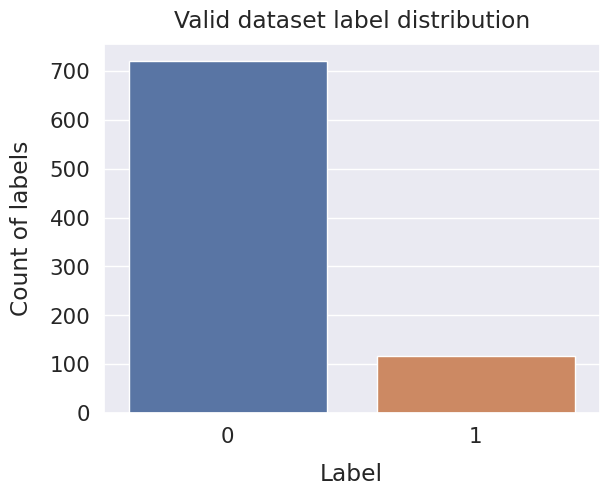

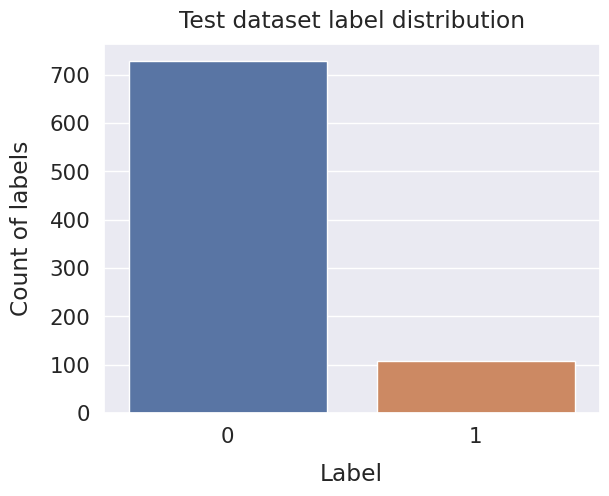

In [15]:
plot_label_distribution(df_train['label'], df_val['label'], df_test['label'])

Now we count how many words and characters for each message.

In [17]:
words_mean_list = []
chars_mean_list = []
for dataframe in (df_train, df_val, df_test):
    word_count = word_count_text(dataframe['text'])
    char_count = char_count_text(dataframe['text'])
    words_mean_list.append(average_word_or_chars(dataframe['label'], word_count))
    chars_mean_list.append(average_word_or_chars(dataframe['label'], char_count))
    dataframe['word_count'] = word_count
    dataframe['char_count'] = char_count

Now visualize the results just obtained.

In [18]:
printer_word_chars(words_mean_list, 'words')
printer_word_chars(chars_mean_list, 'chars')

0 labels length (average words):training 14.2 validation 14.0 test 14.5
1 labels length (average words):training 23.9 validation 23.4 test 24.1
0 labels length (average chars):training 70.7 validation 70.6 test 72.7
1 labels length (average chars):training 138.8 validation 137.6 test 140.7


Now we plot the word counts distribution and the character counts distribution in order to better
see the difference in word/characters length between spam and ham messages.

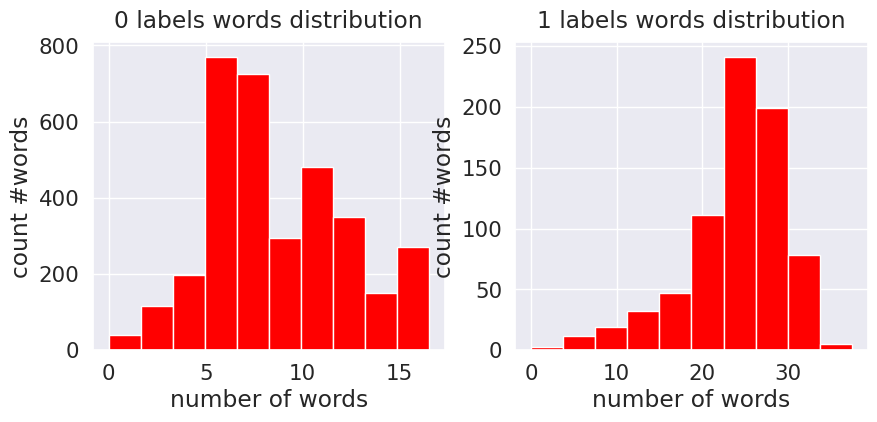

In [21]:
df_complete = pd.concat([df_train, df_val, df_test], ignore_index=True)
plotting_word_char_count(df_complete['label'], df_complete['word_count'], 'words')

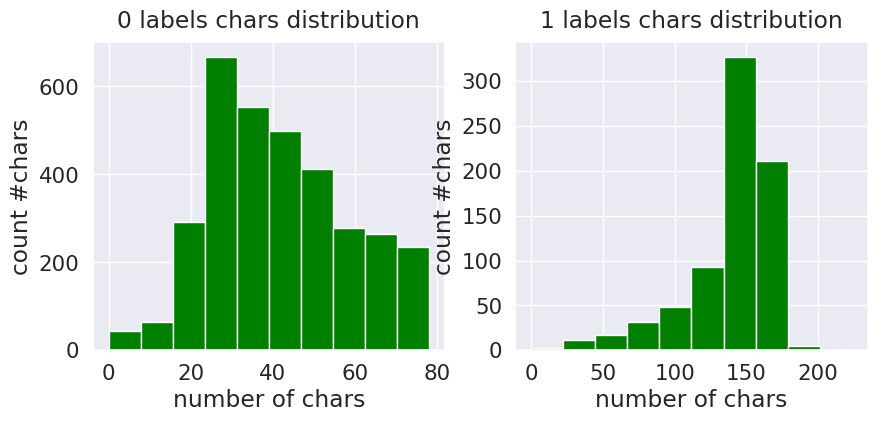

In [22]:
plotting_word_char_count(df_complete['label'], df_complete['char_count'], 'chars')